In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from error_rates import get_all_errors

# Base Dataset

In [28]:
#filepath = "data/2023_NCVR_Panse_1M/records.csv"
filepath = "data/2021_NCVR_Panse_001/dataset_ncvr_dirty.csv"
col_names = "sourceID,globalID,localID,FIRSTNAME,MIDDLENAME,LASTNAME,YEAROFBIRTH,PLACEOFBIRTH,COUNTRY,CITY,PLZ,STREET,GENDER,ETHNIC,RACE".split(",")
df = pd.read_csv(filepath, names=col_names, dtype={"PLZ": str, "YEAROFBIRTH": int}, keep_default_na=False)
df.shape[0]

200000

In [29]:
fig_size = [9, 6]
fig_size_small = [5, 3]

In [30]:
yob_counts = df.YEAROFBIRTH.value_counts()
df = df[~df.YEAROFBIRTH.isin(yob_counts[yob_counts < 2].index)]
df.shape[0]

200000

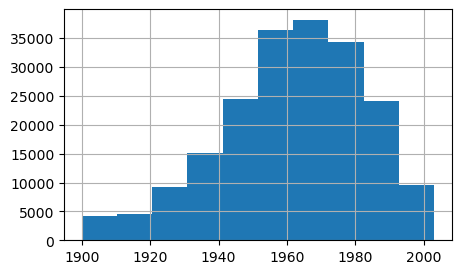

In [31]:
df["YEAROFBIRTH"].hist(figsize=fig_size_small)
# df.YEAROFBIRTH.value_counts().sort_index().plot(kind='bar')
# plt.suptitle("Year of Birth Distribution")
plt.savefig("plots/distr/yob.png")

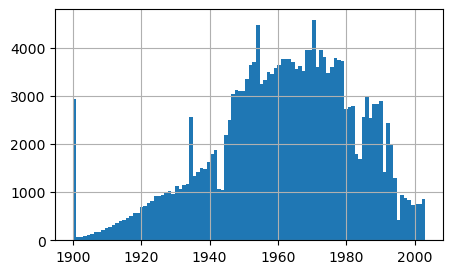

In [32]:
df["YEAROFBIRTH"].hist(bins=100, figsize=fig_size_small)
# plt.suptitle("Year of Birth Distribution")
plt.savefig("plots/distr/yob100.png")

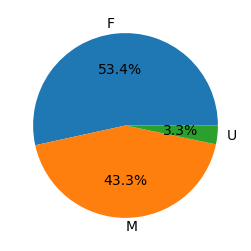

In [33]:
gender_dist = df.groupby(["GENDER"]).size()
plt.pie(x=[v for _, v in gender_dist.items()], labels=[k for k, _ in gender_dist.items()], autopct='%1.1f%%')
# plt.title("Gender Distribution")
plt.savefig("plots/distr/gender.png")

In [34]:
# set figure size
plt.rcParams['figure.figsize'] = fig_size_small

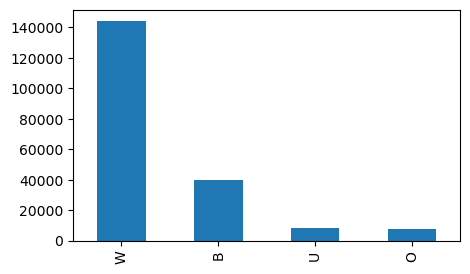

In [35]:
df.RACE.map(lambda v: "O" if v in ["I", "A", "M", "P"] else v).value_counts().plot.bar()
plt.savefig("plots/distr/race.png")

<AxesSubplot:>

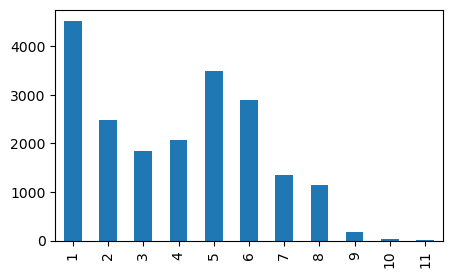

In [36]:
errors = get_all_errors(df, measure="count_errors")
errors.value_counts().sort_index().plot.bar()

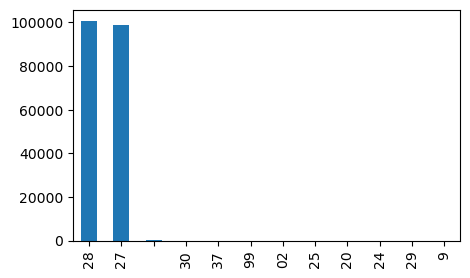

In [37]:
df.PLZ.map(lambda plz: str(plz)[:2]).value_counts().plot.bar()
plt.savefig("plots/distr/plz2.png")

In [38]:
plz_counts = df.PLZ.value_counts()
df = df[~df.PLZ.isin(plz_counts[plz_counts < 2].index)]

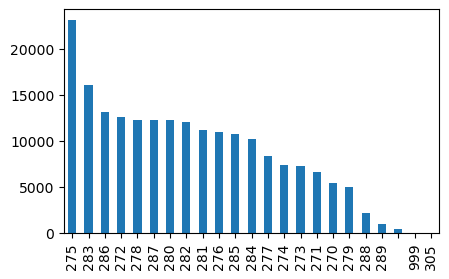

In [39]:
df.PLZ.map(lambda plz: str(plz)[:3]).value_counts().plot.bar()
plt.subplots_adjust(top=0.925,
                    bottom=0.18,
                    left=0.15,
                    right=0.90,
                    hspace=0.01,
                    wspace=0.01)
plt.savefig("plots/distr/plz3.png")